In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1+cu118'

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

> Get our Data

In [ ]:
weight  = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

> Create a train and test set

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

X_test.shape, y_test.shape, X_train.shape, y_train.shape

(torch.Size([10, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([40, 1]))

> Visualize our data

In [ ]:
def plot_predictions(train_data = X_train,
                     train_labels = y_train,
                     test_data = X_test,
                     test_labels = y_test,
                     predictions = None):
  plt.figure(figsize = (10,7))

  plt.scatter(train_data, train_labels, s=4, c = 'b', label = 'Training data')
  plt.scatter(test_data, test_labels, s=4, c = 'g', label = 'Testing data')

  if predictions is not None:
    plt.scatter(test_data, predictions, s=4, c = 'r', label = 'Predicted data')

  plt.legend(loc = 0, prop = {'size':14})

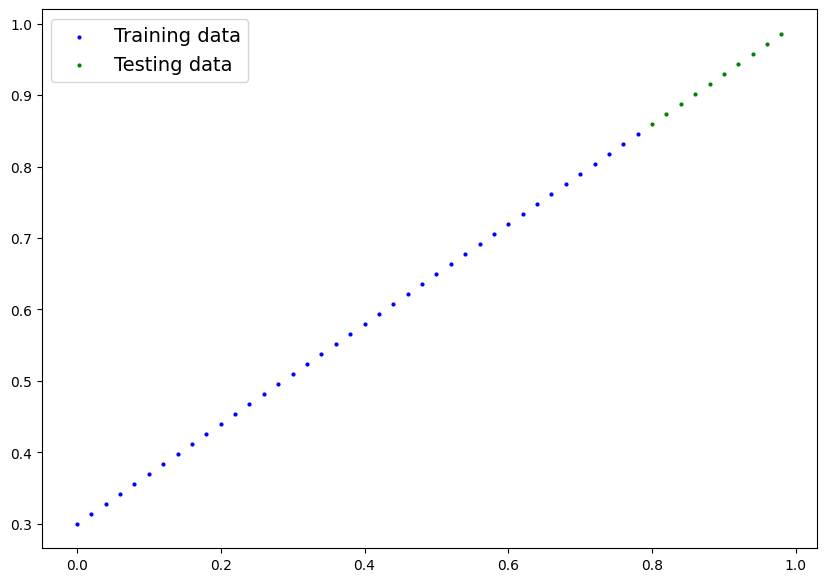

In [ ]:
plot_predictions()

> Build a model

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)
    self.bias = nn.Parameter(torch.randn(1, dtype = torch.float), requires_grad=True)

  def forward(self, X:torch.tensor) -> torch.tensor:
    return self.weights * X + bias

In [ ]:
torch.manual_seed(42)

model_0 = LinearRegressionModel()

list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

> Making predictions using `torch.inference_mode`

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

In [ ]:
y_preds

tensor([[0.5694],
        [0.5761],
        [0.5828],
        [0.5896],
        [0.5963],
        [0.6030],
        [0.6098],
        [0.6165],
        [0.6232],
        [0.6300]])

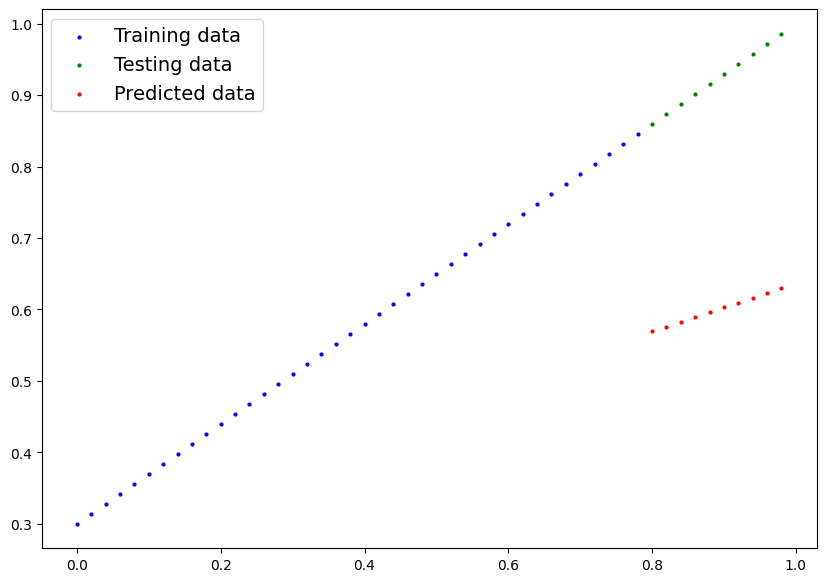

In [ ]:
plot_predictions(predictions=y_preds)

> Train model

- Get a loss function
- Get an optimizer

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 1e-2)

In [ ]:
torch.manual_seed(42)

epochs = 100

train_loss_values = []
test_loss_values = []
epoch_count = []

for epochs in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_0.eval()
  with torch.inference_mode():

    test_pred = model_0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epochs % 10 == 0:
      epoch_count.append(epochs)
      train_loss_values.append(loss.detach().numpy())
      test_loss_values.append(test_loss.detach().numpy())

      print(f'Epoch: {epochs} | MAE Train Loss: {loss:.2f} | MAE Test Loss: {test_loss:.2f}')

Epoch: 0 | MAE Train Loss: 0.14 | MAE Test Loss: 0.32
Epoch: 10 | MAE Train Loss: 0.13 | MAE Test Loss: 0.29
Epoch: 20 | MAE Train Loss: 0.11 | MAE Test Loss: 0.25
Epoch: 30 | MAE Train Loss: 0.10 | MAE Test Loss: 0.22
Epoch: 40 | MAE Train Loss: 0.08 | MAE Test Loss: 0.18
Epoch: 50 | MAE Train Loss: 0.07 | MAE Test Loss: 0.15
Epoch: 60 | MAE Train Loss: 0.05 | MAE Test Loss: 0.11
Epoch: 70 | MAE Train Loss: 0.04 | MAE Test Loss: 0.08
Epoch: 80 | MAE Train Loss: 0.02 | MAE Test Loss: 0.04
Epoch: 90 | MAE Train Loss: 0.00 | MAE Test Loss: 0.01


In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7033])), ('bias', tensor([0.1288]))])

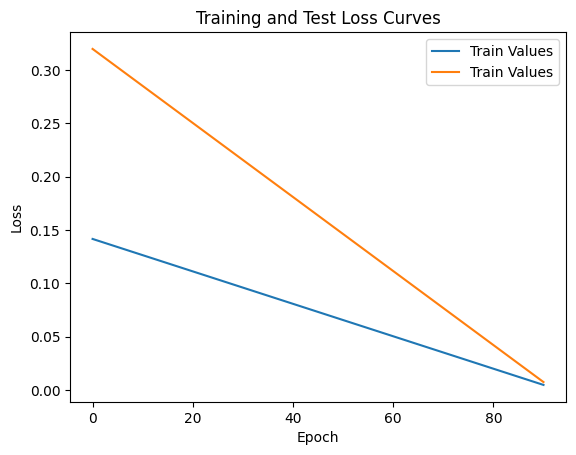

In [ ]:
plt.plot(epoch_count, train_loss_values, label = 'Train Values')
plt.plot(epoch_count, test_loss_values, label = 'Train Values')
plt.title('Training and Test Loss Curves')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc = 0)

> Making Predictions

In [ ]:
model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.8626],
        [0.8767],
        [0.8908],
        [0.9048],
        [0.9189],
        [0.9330],
        [0.9470],
        [0.9611],
        [0.9752],
        [0.9892]])

In [ ]:
y_test-y_preds

tensor([[-0.0026],
        [-0.0027],
        [-0.0028],
        [-0.0028],
        [-0.0029],
        [-0.0030],
        [-0.0030],
        [-0.0031],
        [-0.0032],
        [-0.0032]])

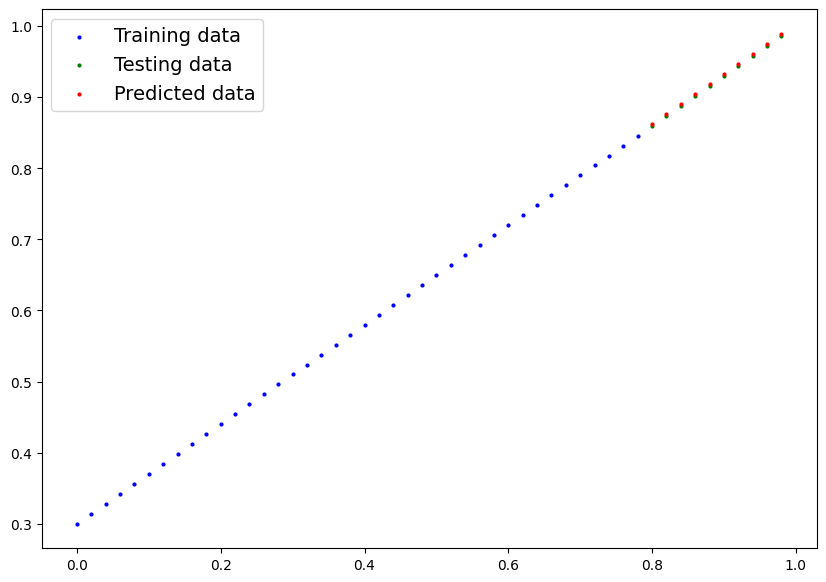

In [ ]:
plot_predictions(predictions = y_preds)

In [ ]:
from pathlib import Path

model_path = Path('/content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models')
model_path.mkdir(parents=True, exist_ok = True)
model_name = 'pytorch_workflow_fundamentals_model_0.pth'
model_save_path = model_path/model_name

print(f'Saving model to: {model_path} ......')
torch.save(obj = model_0.state_dict(), f = model_save_path)

Saving model to: /content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models ......


In [ ]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f = model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_0.eval()

with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

In [ ]:
y_preds == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

> Building a PyTorch linear model

- Build a Second Model Using `nn.Linear()`

In [ ]:
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features = 1, out_features = 1)

  def forward(self, X:torch.tensor) -> torch.tensor:
    return self.linear(X)

In [ ]:
torch.manual_seed(42)
model_1 = LinearRegressionModelV2().to(device)

model_1.state_dict()

OrderedDict([('linear.weight', tensor([[0.7645]], device='cuda:0')),
             ('linear.bias', tensor([0.8300], device='cuda:0'))])

In [ ]:
model_1, next(model_1.parameters()).device

(LinearRegressionModelV2(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 device(type='cuda', index=0))

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_1.parameters(), lr = 1e-2)

In [ ]:
torch.manual_seed(42)

epochs = 1000

X_train, y_train, X_test, y_test = X_train.to(device), y_train.to(device), X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  y_pred = model_1(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()

  if epoch % 100 == 0:
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

    print(f'Epoch: {epoch} | Train Loss: {loss} | Test  Loss: {test_loss}')

Epoch: 0 | Train Loss: 0.5551779866218567 | Test  Loss: 0.5739762187004089
Epoch: 100 | Train Loss: 0.006215683650225401 | Test  Loss: 0.014086711220443249
Epoch: 200 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 300 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 400 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 500 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 600 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 700 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 800 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882
Epoch: 900 | Train Loss: 0.0012645035749301314 | Test  Loss: 0.013801801018416882


In [45]:
model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)

y_preds

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

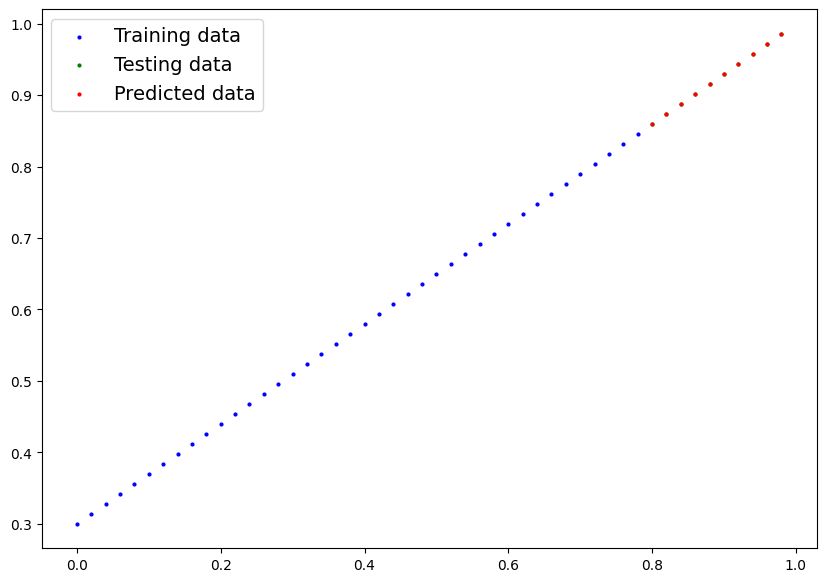

In [47]:
plot_predictions(predictions = y_preds.cpu())

In [48]:
from pathlib import Path

model_path = Path('/content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models')
model_path.mkdir(parents=True, exist_ok = True)
model_name_1 = 'pytorch_workflow_fundamentals_model_1.pth'
model_save_path_1 = model_path/model_name_1

print(f'Saving model to: {model_path} ......')
torch.save(obj = model_1.state_dict(), f = model_save_path_1)

Saving model to: /content/drive/MyDrive/Colab Notebooks/pytorch_tutorial/models ......


In [49]:
loaded_model_1 = LinearRegressionModelV2()

loaded_model_1.load_state_dict(torch.load(model_save_path_1))

loaded_model_1.to(device)

loaded_model_1, next(loaded_model_1.parameters()).device

(LinearRegressionModelV2(
   (linear): Linear(in_features=1, out_features=1, bias=True)
 ),
 device(type='cuda', index=0))

In [50]:
loaded_model_1.eval()

with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)

y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')